## Google Colab

대부분의 내용은 https://brunch.co.kr/@jayden-factory/11 사이트를 참고하였습니다.

### Google Colab이란?
    머신러닝 교육과 연구를 위한 연구 도구 입니다. Jupyter Notebook 환경이므로 설치 없이도 사용 할 수 있습니다. 또한, Jupyter 노트를 사용하지 않고, 다른 사용자들과 편리하게 공유/수정이 가능합니다.
    
    구글 계정이 있으면 무료로 사용이 가능하며, 지원하는 언어는 Python 2.7과 3.6 버전을 지원하고 있습니다.    

### Google Colab의 기본 사양(18.6.16 기준)
    
    - CPU : Intel(R) Xeon(R) CPU @ 2.30GHz
    - GPU : Tesla K80 GPU
    - Python 3.6.3
    - Ubuntu 17.10
    - tensorflow 1.8.0

### GPU 사용 방법
    
    - 수정 -> '노트 설정' 메뉴에 들어가면 '하드웨어 가속기' 란에서 GPU 사용 여부 설정이 가능합니다.
    ![image.png](attachment:image.png)

### Google Drive 연동

Google Colab은 로컬 PC가 아닌, 클라우드 환경에서 작업이 이루어집니다. 자세히 보면 Colab이 클라우드 어딘가에서 'docker'로 동작한다고 합니다. 따라서 작업을 하는 도중 필요한 파일을 install하거나, github에서 파일을 다운로드 할 경우에 드라이브가 아닌 docker에 저장되기 때문에 평생 종속되지 않습니다. 즉 일정 시간이 지나면 파일이 사라지게 됩니다. 따라서 영구적으로 파일을 사용하기 위해서는 필요한 파일을 google drive에 저장시켜놓고 colab과 drive를 연동하는 과정이 필요합니다.

출처: [Pytorch 셋업하기](https://youngguncho.github.io/2018/04/10/Colab-setup/), [jaeyeon Beak](http://jybaek.tistory.com/686)

#### 1. Install Google Drive SDK

이제 서버에서 구글 드라이브를 연동에서 사용하기 위해 Google Drive SDK를 설치합니다. 설치 및 인증은 간단히 아래의 코드를 실행하면 됩니다. 코드를 실행하면 설치후에 인증 절차가 시작되는데, 제공되는 링크를 들어가서 복사한 인증 코드를 빈칸에 작성하면 인증이 완료 됩니다. 해보니 두번 인증을 해야하네요. 처음 verification code를 입력하고, 다시 나오는 링크에서 코드를 복사 후 한번 더 인증을 해야합니다. (아마 인증이 timeout되어 두번 된 것 일수도 있습니다.)

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
지정된 경로를 찾을 수 없습니다.
지정된 경로를 찾을 수 없습니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


ModuleNotFoundError: No module named 'google.colab'

코드가 실행된 후에 링크를 눌러 이동하게 되면 코드를 받을 수 있습니다.

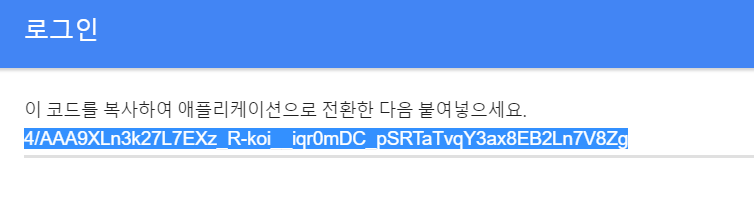

위에서 받은 코드를 해당 창에 입력하게 되면 인증이 완료됩니다.

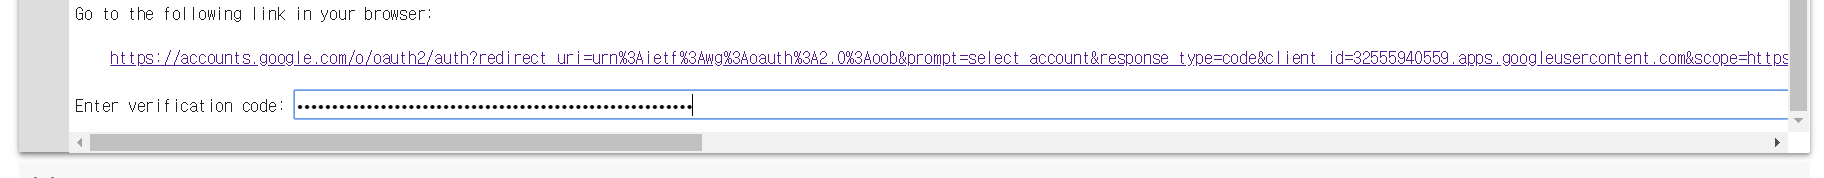

#### 2. Mount Google Drive

다음은 Google Drive를 서버에 마운트합니다. 개인이 가지고 있는 구글 드라이브의 데이터 및 코드를 사용하기 위함이죠. 여기선 drive폴더에 구글 드라이브의 root가 연동되게 됩니다. !ls drive를 하면 가장 상위 디렉토리의 내용이 나와야 하죠. 제대로 연동이 되었다면 이제 위에서 만들어두었던 colab, dataset 폴더에 drive/colab 그리고 drive/dataset으로 접근이 가능합니다!

In [ ]:
!mkdir -p drive #구글 디렉토리 drive 생성
!google-drive-ocamlfuse drive #생성한 디렉토리에 구글 드라이브 연동
!!ls /content/drive/ #구글 drive 확인

### Fashion mnist 데이터 load하기

In [ ]:
#Setting

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
#fix seed num
tf.set_random_seed(123)

In [ ]:
#Load the fashion mnist dataset
mnist = input_data.read_data_sets("/content/drive/tensorflow_flip/data/fashion/", one_hot=True)

'''
images : 이미지 데이터셋
labels : label 데이터셋
num_examples : 데이터 갯수
next_batch : 데이터셋으로부터 필요한 만큼의 데이터를 반환하는 함수

출처: http://pythonkim.tistory.com/46 [파이쿵]
'''

In [ ]:
#sample data
img = mnist.train.images[100].reshape(28,28)
plt.imshow(img, cmap='gray')

In [ ]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="same", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="same", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [ ]:
# initialize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))